In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [2]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#e37e00',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'font.family': 'Khmer Sangam MN',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'grid.linewidth': '1',
  'legend.scatterpoints': '2',
  'axes.titlesize': 'large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  'axes.prop_cycle': cycler('color', ['#C10534', '#ffd200', '#e37e00', '#00887d', '#7ad2f6', '#014d64']),
  'xtick.major.bottom': True,
  'xtick.minor.bottom': True,
  'xtick.major.size': 7,
  'xtick.major.pad': 2,
  'xtick.direction': 'in',
  'xtick.labelsize': 'medium',
  'ytick.left': True,
  'ytick.labelsize': 'large',
  'grid.color': '#d9e6eb',
  'grid.linestyle': '-',
  'figure.facecolor': 'white'
})

In [3]:
df = pd.read_csv("gdp_merge.csv")

In [11]:
# QC'ing my joined df to make sure no countries got duplicated
# df[~df.Origin.isnull()] JUST NOTE TO REMEMBER THE TIDLA MEANS NOT THIS
# df[df.Origin.isnull()] ANY ROW THAT HAS NaN IN Origin COLUMN MUST BE A DUP FROM SLIGHTLY DIFF
# NAME IN THE GDP DF THAT CAME FROM THE JOIN BUT THERE AREN'T ANY

In [4]:
df.Origin.value_counts()

Syrian Arab Rep.    112
Name: Origin, dtype: int64

In [5]:
df.head()

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population,country_code,rank,gdp
0,2017.0,Albania,Syrian Arab Rep.,NaN,22.0,NaN,NaN,NaN,NaN,NaN,25.0,ALB,126.0,13039.0
1,2017.0,United Arab Emirates,Syrian Arab Rep.,128.0,1185.0,NaN,NaN,NaN,NaN,NaN,1313.0,ARE,29.0,382575.0
2,2017.0,Argentina,Syrian Arab Rep.,370.0,84.0,NaN,NaN,NaN,NaN,348.0,802.0,ARG,21.0,637590.0
3,2017.0,Armenia,Syrian Arab Rep.,14680.0,12.0,NaN,NaN,NaN,NaN,NaN,14692.0,ARM,133.0,11537.0
4,2017.0,Australia,Syrian Arab Rep.,477.0,130.0,NaN,NaN,NaN,NaN,NaN,607.0,AUS,13.0,1323421.0


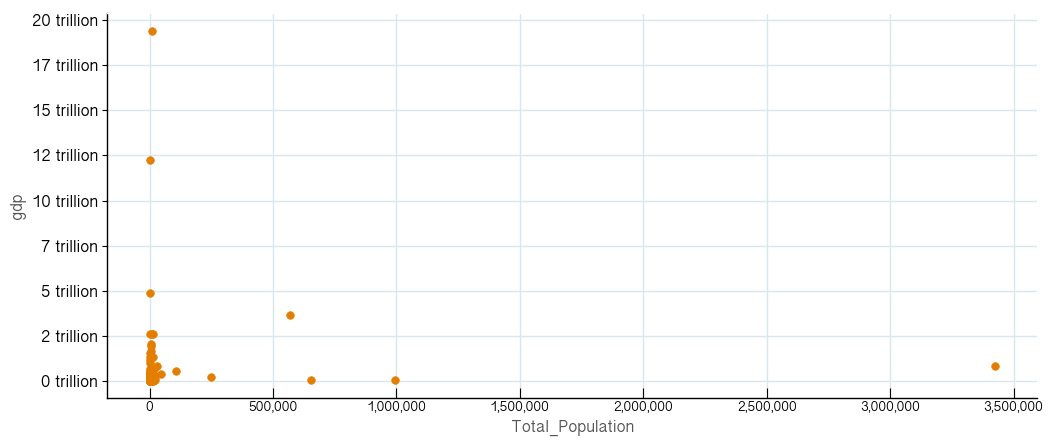

In [59]:
from matplotlib.ticker import FuncFormatter

def with_commas(value, pos):
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)

def with_words(value, pos):
    trillions = int(value / 1000000)
    return "{} trillion".format(trillions)

w_formatter = FuncFormatter(with_words)

ax = df.plot(kind='scatter', x='Total_Population', y='gdp', s=30, figsize=(12,5))

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(w_formatter)

# ax.set_title("Big economies, small refugee numbers", fontweight='bold', pad=20)
# add subtitle in Ai: "Country GDP v number of Syrian refugees it's hosting"
ax.title.set_fontsize(33)
ax.title.set_fontname("Khmer Sangam MN")

# ax.set_xlabel("Syrian refugees hosted, 2017")
# ax.set_ylabel("GDP")

ax.spines['bottom'].set_color('black')
# ax.spines['top'].set_color('black')
# try something with ax.grid(False, axis=0) something like that to keep vert grid lines only
ax.spines['left'].set_color('black')

plt.savefig("refugees_scatter.pdf", transparent=True)
plt.show()

In [ ]:
# SAVE THE SCATTER, FIX IT IN AI
# MAKE THE TWO OTHER GRAPHS, WITH TOP FIVE GDP AND REFUGEES, AND TOP FIVE HOSTERS AND THEIR GDP RANK

In [21]:
pop_df = pd.read_csv("WorldBank_pop.csv")
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [24]:
# pop_df.dtypes

In [26]:
cols = ['Country Name', '2017']
mypop_df = pop_df[cols]
mypop_df.head()

,Country Name,2017
0,Aruba,105264.0
1,Afghanistan,35530081.0
2,Angola,29784193.0
3,Albania,2873457.0
4,Andorra,76965.0


In [28]:
df.shape

(112, 14)

In [29]:
mypop_df.shape

(264, 2)

In [36]:
host_countries_list = df.Host_Country.tolist()
print(host_countries_list)

['Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Benin', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Bolivia (Plurinational State of)', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. of the Congo', 'Congo', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Rep.', 'Germany', 'Djibouti', 'Denmark', 'Dominican Rep.', 'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'France', 'United Kingdom', 'Georgia', 'Ghana', 'Greece', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iraq', 'Iceland', 'Italy', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Rep. of Korea', 'Kuwait', 'Lebanon', 'Liberia', 'Libya', 'Liechtenstein', 'Sri Lanka', 'Lithuania', 'Luxembourg', 'Latvia', 'Morocco', 'Rep. of Moldova', 'Mexico', 'The former Yugoslav Republic of Macedonia', 'Mali', 'Malta', 'Montenegro', 'Mauritania', 'Malaysia', 'Niger', 'Nigeria', 'Netherlands

In [48]:
mypop_df2 = mypop_df[mypop_df['Country Name'].isin(host_countries_list)]
mypop_df2.head()

,Country Name,2017
3,Albania,2873457.0
6,United Arab Emirates,9400145.0
7,Argentina,44271041.0
8,Armenia,2930450.0
11,Australia,24598933.0


In [47]:
# Trying to loop through list of host countries to identify where the name differs from what's
# on my population df.
# for country in host_countries_list:
#     pandas_return = mypop_df[mypop_df['Country Name'] == country]
#     if pandas_return['Country Name'] == country:
#         print("It's in there")
#     else:
#         print(country)

In [50]:
mypop_df2.rename(index=str, columns={"Country Name": "Host_Country"}, inplace=True)
mypop_df2.head()
# df2.rename(index=str, columns={"country": "Host_Country"}, inplace=True)
# df2.head()

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Host_Country,2017
3,Albania,2873457.0
6,United Arab Emirates,9400145.0
7,Argentina,44271041.0
8,Armenia,2930450.0
11,Australia,24598933.0


In [53]:
pop_merge = pd.merge(mypop_df2, df, on='Host_Country', how='outer')
pop_merge.dtypes

Host_Country                            object
2017                                   float64
Year                                   float64
Origin                                  object
Refugees                               float64
Asylum-seekers                         float64
Returned refugees                      float64
Internally_Displaced_Persons_(IDPs)    float64
Returned_IDPs                          float64
Stateless persons                      float64
Others_of_concern                      float64
Total_Population                       float64
country_code                            object
rank                                   float64
gdp                                    float64
dtype: object

In [62]:
pop_merge['gdp_per_capita'] = round(pop_merge['gdp'] * 1000000 / pop_merge['2017'], 2)
# df2['GDP'] = df2.GDP_per_capita * df2.Population
pop_merge[pop_merge.Host_Country == "United States"]

,Host_Country,2017,Year,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population,country_code,rank,gdp,gdp_per_capita
96,United States,325719178.0,2017.0,Syrian Arab Rep.,7282.0,3358.0,NaN,NaN,NaN,NaN,NaN,10640.0,USA,1.0,19390604.0,59531.66


In [64]:
pop_merge.to_csv("all_merged.csv", index=False)

In [65]:
df2 = pd.read_csv("all_merged.csv")

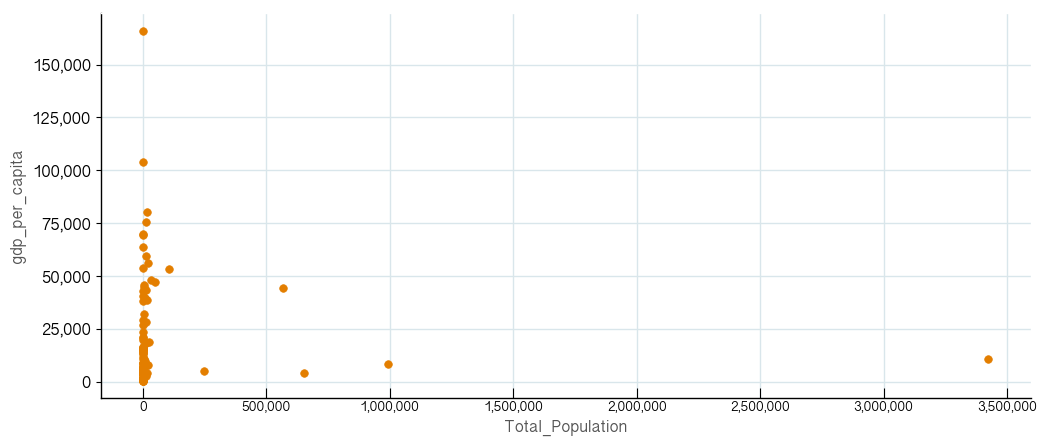

In [68]:
ax = df2.plot(kind='scatter', x='Total_Population', y='gdp_per_capita', s=30, figsize=(12,5))

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

# ax.set_title("", fontweight='bold', pad=20)
# add subtitle in Ai: "Country GDP per capita v number of Syrian refugees it's hosting"
ax.title.set_fontsize(33)
ax.title.set_fontname("Khmer Sangam MN")

# ax.set_xlabel("Syrian refugees hosted, 2017")
# ax.set_ylabel("GDP")

ax.spines['bottom'].set_color('black')
# ax.spines['top'].set_color('black')
# try something with ax.grid(False, axis=0) something like that to keep vert grid lines only
ax.spines['left'].set_color('black')

plt.savefig("refugees_scatter_gdp_per_capita.pdf")
plt.show()

In [82]:
top_per_cap = df2.sort_values(by='gdp_per_capita', ascending=False).head(10)
top_per_cap

,Host_Country,2017,Year,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population,country_code,rank,gdp,gdp_per_capita
52,Liechtenstein,37922.0,2017.0,Syrian Arab Rep.,32.0,NaN,NaN,NaN,NaN,NaN,NaN,33.0,LIE,151.0,6289.0,165840.41
55,Luxembourg,599449.0,2017.0,Syrian Arab Rep.,686.0,225.0,NaN,NaN,NaN,NaN,NaN,911.0,LUX,73.0,62404.0,104102.27
14,Switzerland,8466017.0,2017.0,Syrian Arab Rep.,13639.0,3192.0,NaN,NaN,NaN,NaN,NaN,16831.0,CHE,20.0,678887.0,80189.66
67,Norway,5282223.0,2017.0,Syrian Arab Rep.,11498.0,17.0,NaN,NaN,NaN,NaN,NaN,11515.0,NOR,28.0,398832.0,75504.57
42,Iceland,341284.0,2017.0,Syrian Arab Rep.,58.0,5.0,NaN,NaN,NaN,NaN,NaN,63.0,ISL,105.0,23909.0,70056.02
40,Ireland,4813608.0,2017.0,Syrian Arab Rep.,718.0,138.0,NaN,NaN,NaN,NaN,NaN,856.0,IRL,34.0,333731.0,69330.74
77,Qatar,2639211.0,2017.0,Syrian Arab Rep.,34.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,QAT,54.0,167605.0,63505.72
96,United States,325719178.0,2017.0,Syrian Arab Rep.,7282.0,3358.0,NaN,NaN,NaN,NaN,NaN,10640.0,USA,1.0,19390604.0,59531.66
24,Denmark,5769603.0,2017.0,Syrian Arab Rep.,19221.0,285.0,NaN,NaN,NaN,NaN,NaN,19506.0,DNK,35.0,324872.0,56307.51
4,Australia,24598933.0,2017.0,Syrian Arab Rep.,477.0,130.0,NaN,NaN,NaN,NaN,NaN,607.0,AUS,13.0,1323421.0,53799.94


In [78]:
top_gdp = df2.sort_values(by='gdp', ascending=False).head(10)

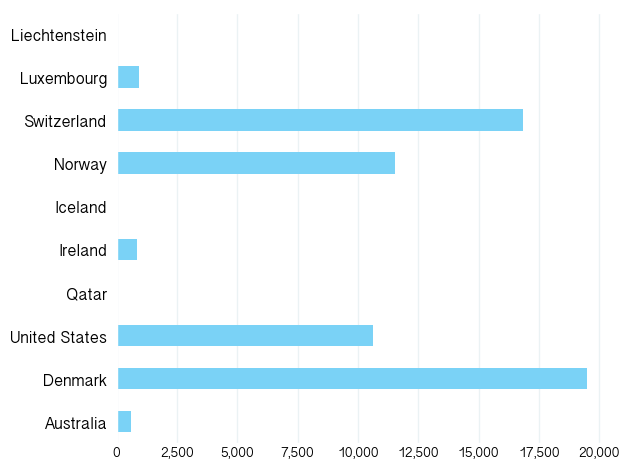

In [84]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][4]
ax = top_per_cap.sort_values(by='gdp_per_capita', ascending=True).plot(kind='barh', x='Host_Country', y='Total_Population', color=color)

# ax.set_title("Countries with the most Syrian refugees in 2017", fontweight='bold', pad=20)
# ax.title.set_fontsize(18)
# ax.title.set_fontname("Khmer Sangam MN")

ax.legend_.remove()
ax.yaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

ax.xaxis.set_major_formatter(formatter)

ax.grid(False, axis='y')

plt.tight_layout()
plt.savefig("top_per_cap_bar_graph.pdf")
plt.show()

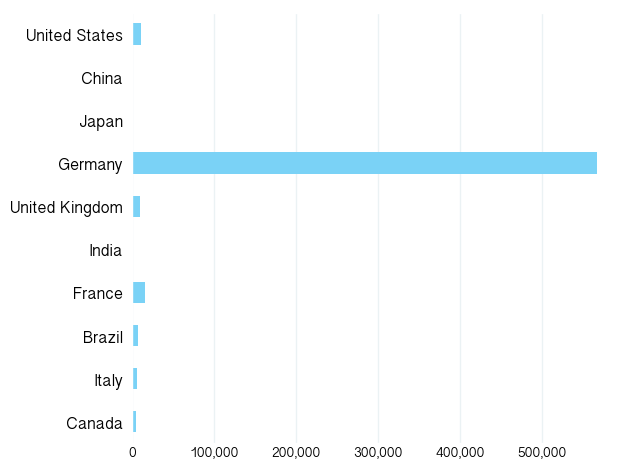

In [85]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][4]
ax = top_gdp.sort_values(by='gdp', ascending=True).plot(kind='barh', x='Host_Country', y='Total_Population', color=color)

# ax.set_title("Countries with the most Syrian refugees in 2017", fontweight='bold', pad=20)
# ax.title.set_fontsize(18)
# ax.title.set_fontname("Khmer Sangam MN")

ax.legend_.remove()
ax.yaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

ax.xaxis.set_major_formatter(formatter)

ax.grid(False, axis='y')

plt.tight_layout()
plt.savefig("top_gdp_bar_graph.pdf")
plt.show()

In [93]:
df[df.Host_Country == "Iceland"]

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population,country_code,rank,gdp
49,2017.0,Iceland,Syrian Arab Rep.,58.0,5.0,NaN,NaN,NaN,NaN,NaN,63.0,ISL,105.0,23909.0
